<a href="https://colab.research.google.com/github/DebicharanTripathy/DebicharanTripathy/blob/main/m22ai545_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Author: Debicharan Tripathy
# Roll no: m22ai545

import os, requests, tarfile, shutil
from PIL import Image
import numpy as np
import random

# Download and extract dataset from the given PASCAL VOC 2007 dataset
url, data_folder, dataset_file = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar', 'Data', os.path.join('Data', 'VOCtrainval_06-Nov-2007.tar')
os.makedirs(data_folder, exist_ok=True)
if not os.path.exists(dataset_file):
  with open(dataset_file, 'wb') as file:
    file.write(requests.get(url).content)
with tarfile.open(dataset_file, 'r') as tar:
  tar.extractall(data_folder)
print('Dataset preparation completed.')

# Preprocess the dataset by resizing the images to a fixed size and normalizing the pixel values.
# Preprocessing the images
image_folder, output_folder = os.path.join(data_folder, 'VOCdevkit', 'VOC2007', 'JPEGImages'), os.path.join(data_folder, 'preprocessed')
os.makedirs(output_folder, exist_ok=True)
image_size = (64, 64)
[Image.fromarray((np.array(Image.open(os.path.join(image_folder, f)).resize(image_size)) / 255.0 * 255.0).astype(np.uint8)).save(os.path.join(output_folder, f)) for f in os.listdir(image_folder)]
print('Dataset preprocessing completed.')

Dataset preparation completed.
Dataset preprocessing completed.


Training and evaluating autoencoder with bottleneck dimension: 256
1/1 [==============================] - 0s 127ms/step
Training and evaluating autoencoder with bottleneck dimension: 128
1/1 [==============================] - 0s 82ms/step
Training and evaluating autoencoder with bottleneck dimension: 64
1/1 [==============================] - 0s 68ms/step
Training and evaluating autoencoder with bottleneck dimension: 32
1/1 [==============================] - 0s 74ms/step
Training and evaluating autoencoder with bottleneck dimension: 16


1/1 [==============================] - 0s 95ms/step


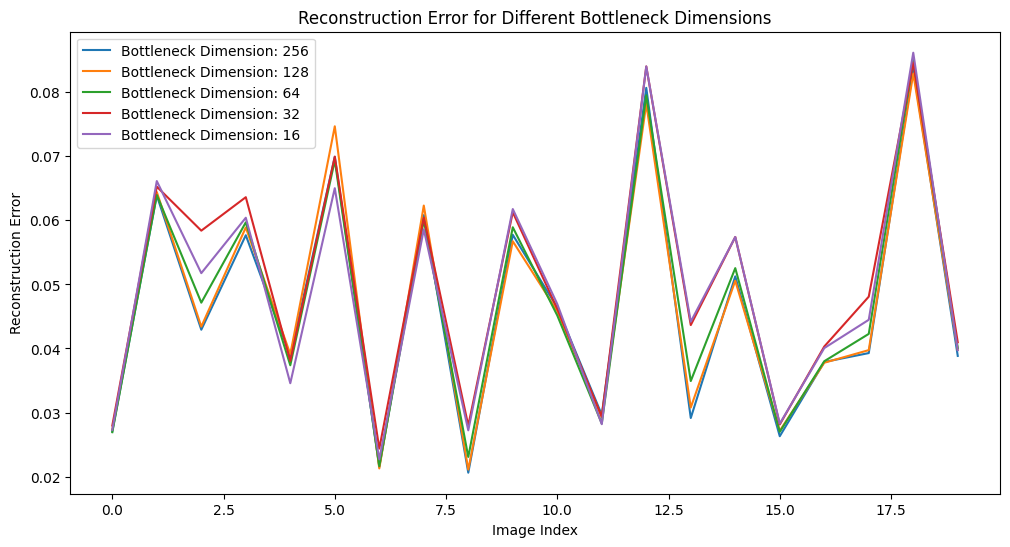

The best bottleneck dimension is: 256
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 12288)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               3145984   
                                                                 
 dense_11 (Dense)            (None, 12288)             3158016   
                                                                 
 reshape_5 (Reshape)         (None, 64, 64, 3)         0         
                                                                 
Total params: 6,304,000
Trainable params: 6,304,000
Non-trainable params: 0
_________________________________________________________________
Training an

1/1 [==============================] - 0s 73ms/step
Training and evaluating autoencoder with 40% masked pixels
1/1 [==============================] - 0s 37ms/step
Training and evaluating autoencoder with 60% masked pixels
1/1 [==============================] - 0s 38ms/step
Training and evaluating autoencoder with 80% masked pixels
1/1 [==============================] - 0s 55ms/step


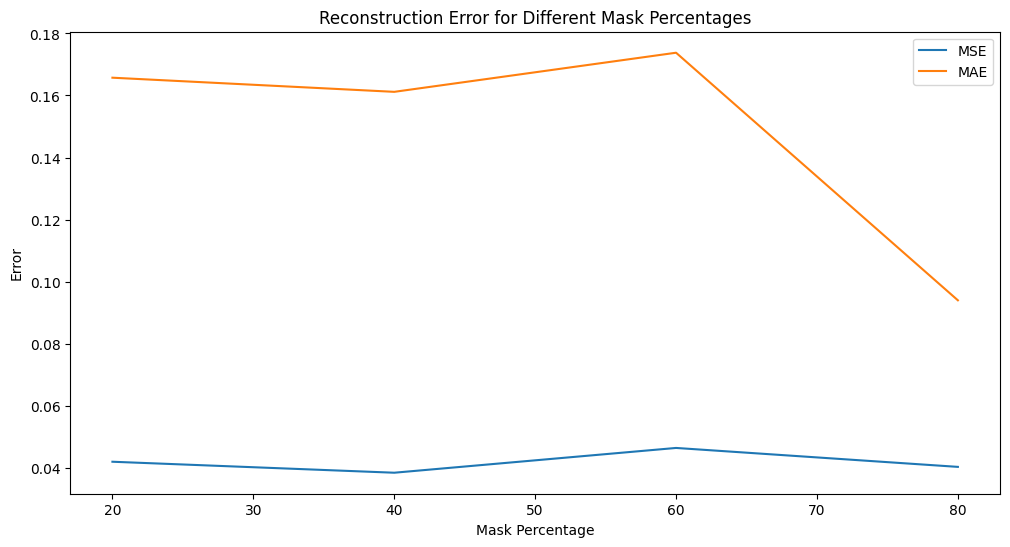

Evaluation Results:
Bottleneck Dimension	MSE			MAE
---------------------------------------------
256			0.046203092392276386		0.17352365181611165
128			0.046563213951359074		0.17441918893747982
64			0.04704833932687659		0.17485119508766395
32			0.05000094227118959		0.1807587597893902
16			0.048745670110933025		0.1778060130167537

Best Bottleneck Dimension: 256
Best Mask Percentage: 40
1/1 [==============================] - 0s 43ms/step


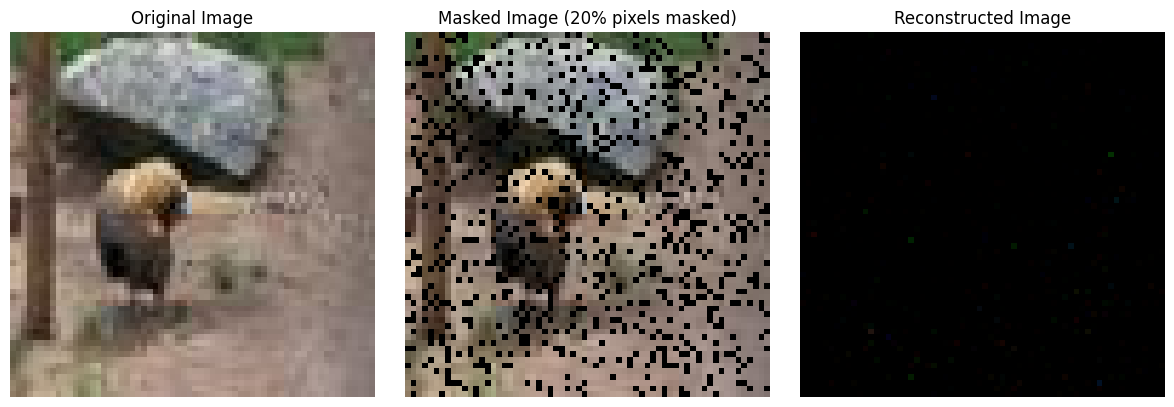

1/1 [==============================] - 0s 37ms/step


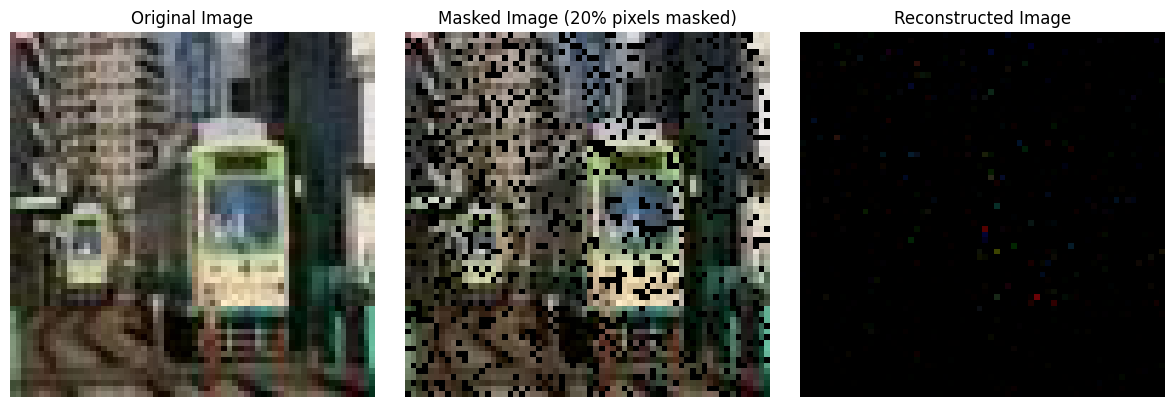

1/1 [==============================] - 0s 34ms/step


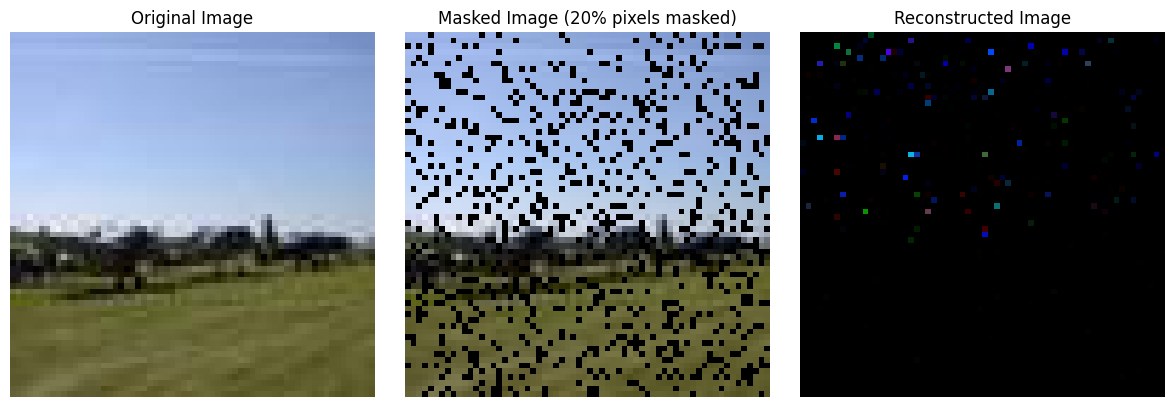

1/1 [==============================] - 0s 39ms/step


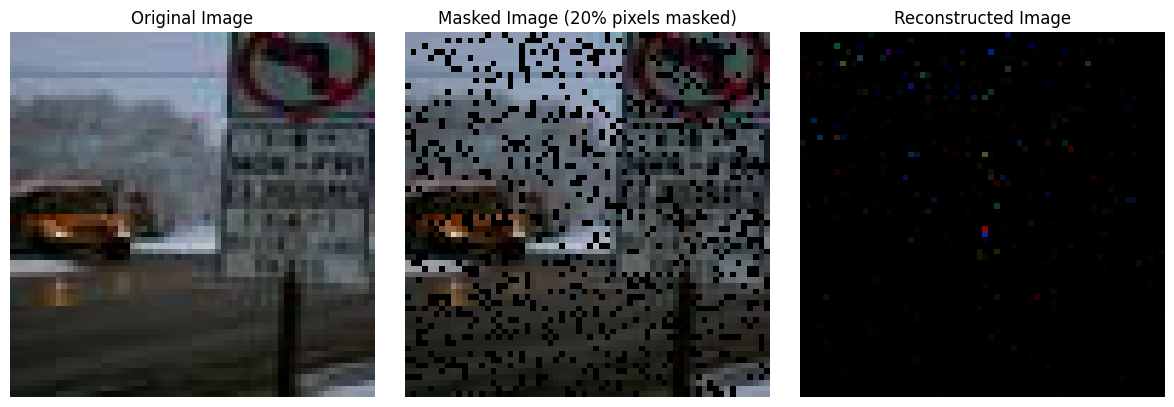

1/1 [==============================] - 0s 28ms/step


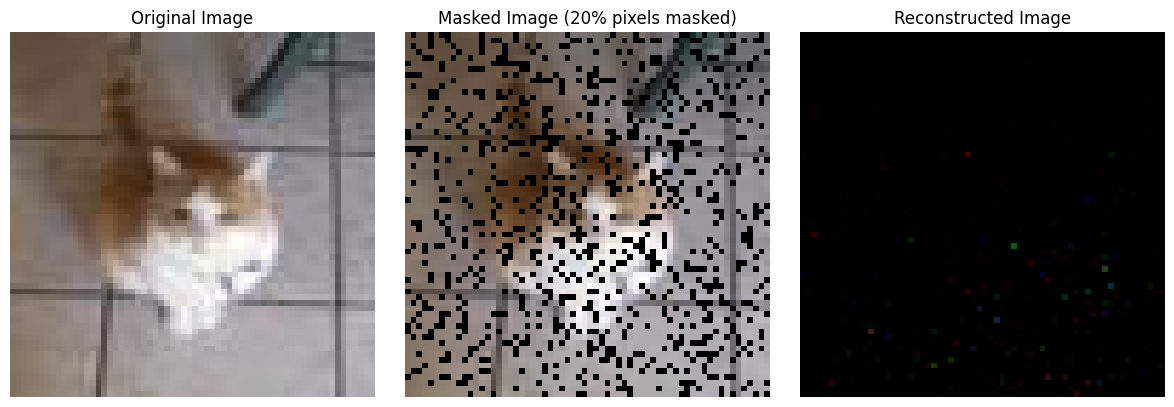

1/1 [==============================] - 0s 28ms/step


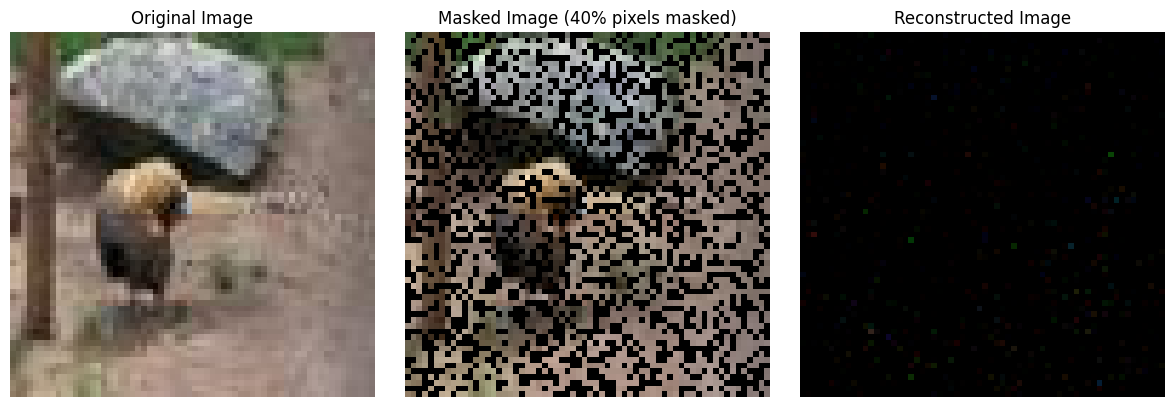

1/1 [==============================] - 0s 34ms/step


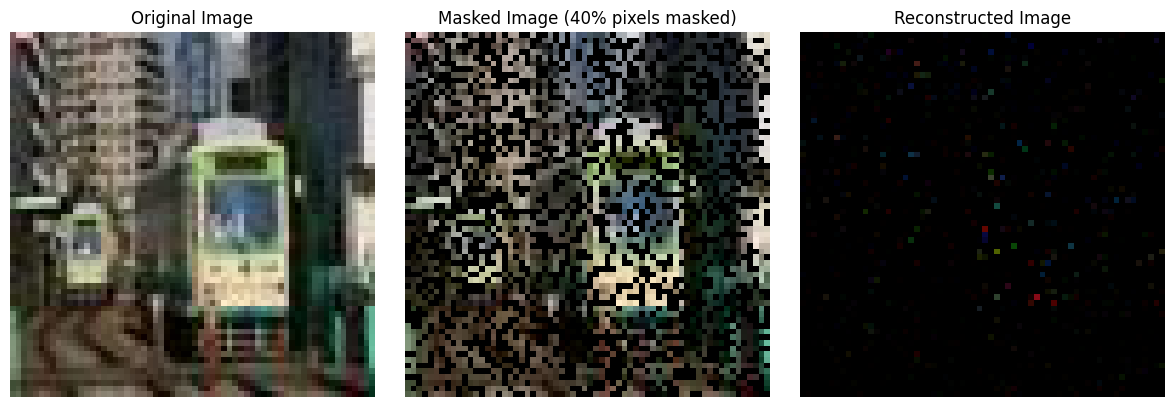

1/1 [==============================] - 0s 28ms/step


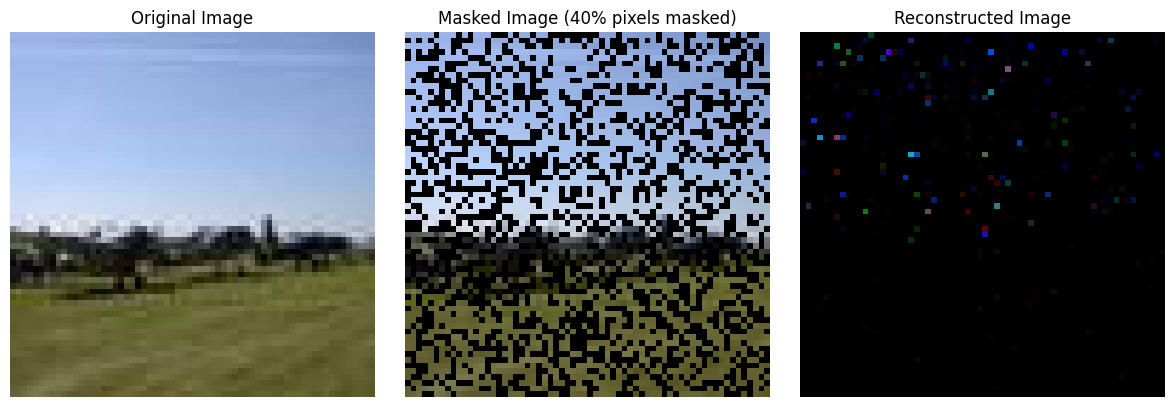

1/1 [==============================] - 0s 27ms/step


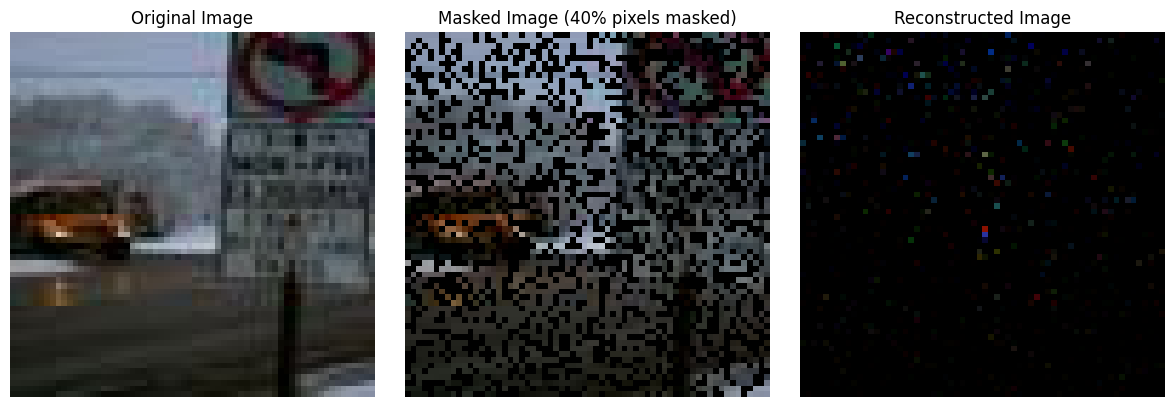

1/1 [==============================] - 0s 28ms/step


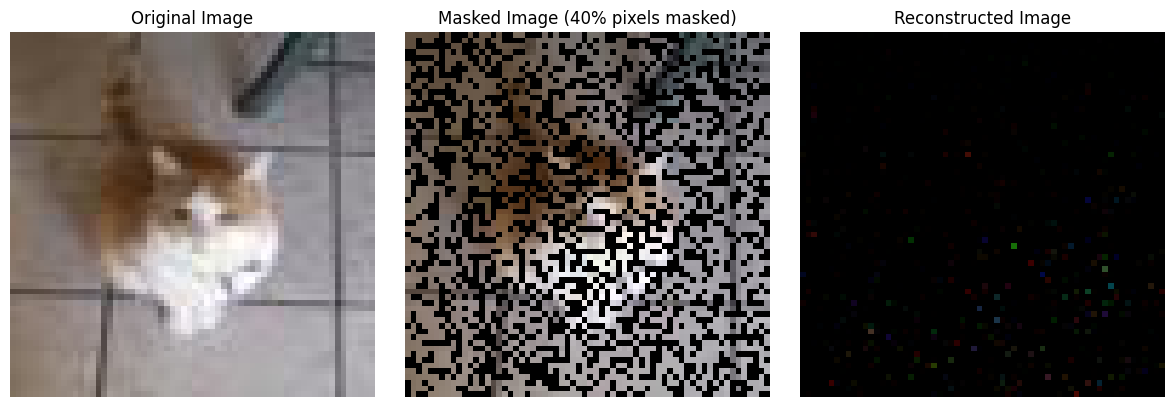

1/1 [==============================] - 0s 31ms/step


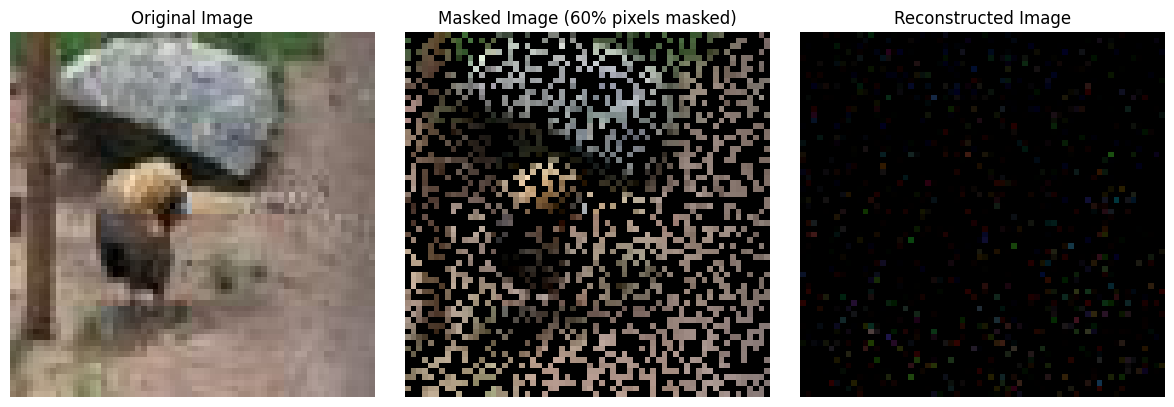

1/1 [==============================] - 0s 28ms/step


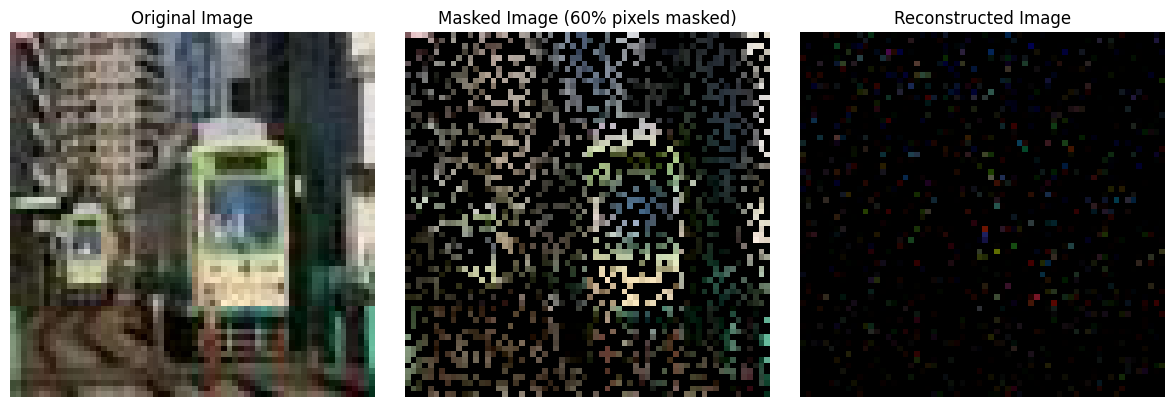

1/1 [==============================] - 0s 25ms/step


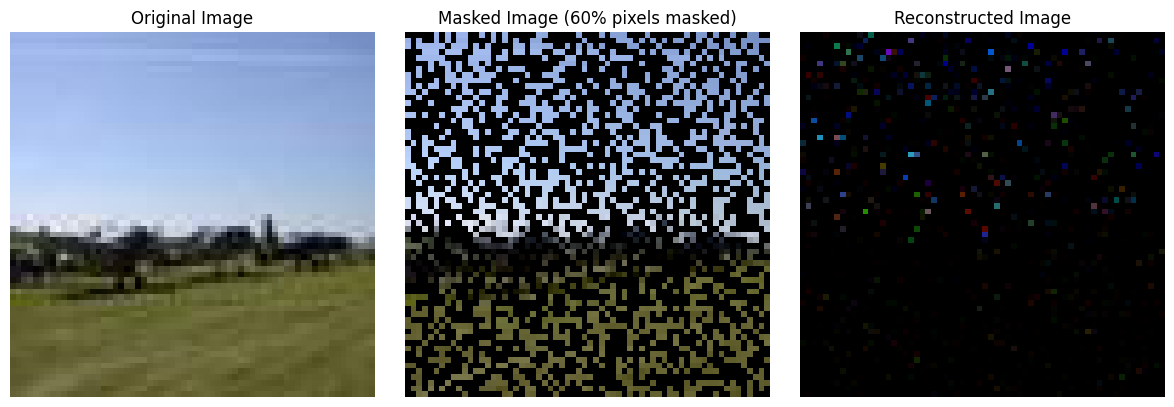

1/1 [==============================] - 0s 30ms/step


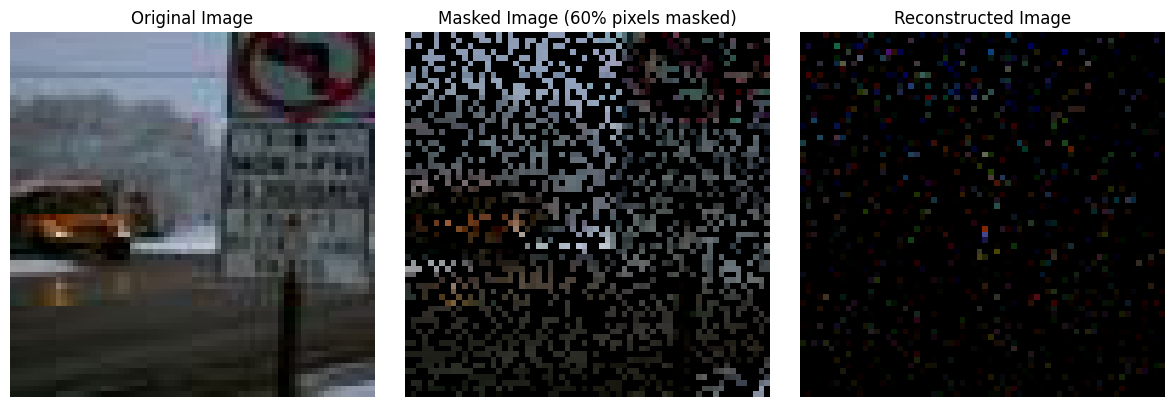

1/1 [==============================] - 0s 36ms/step


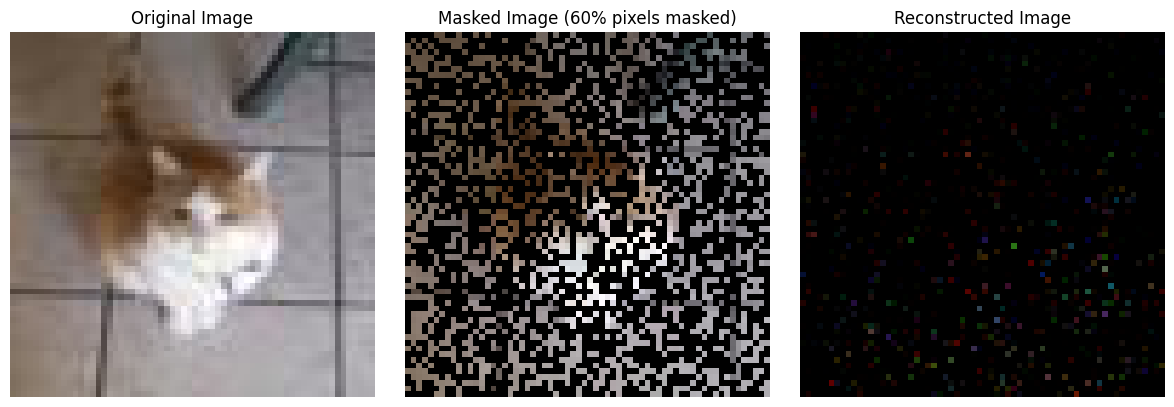

1/1 [==============================] - 0s 31ms/step


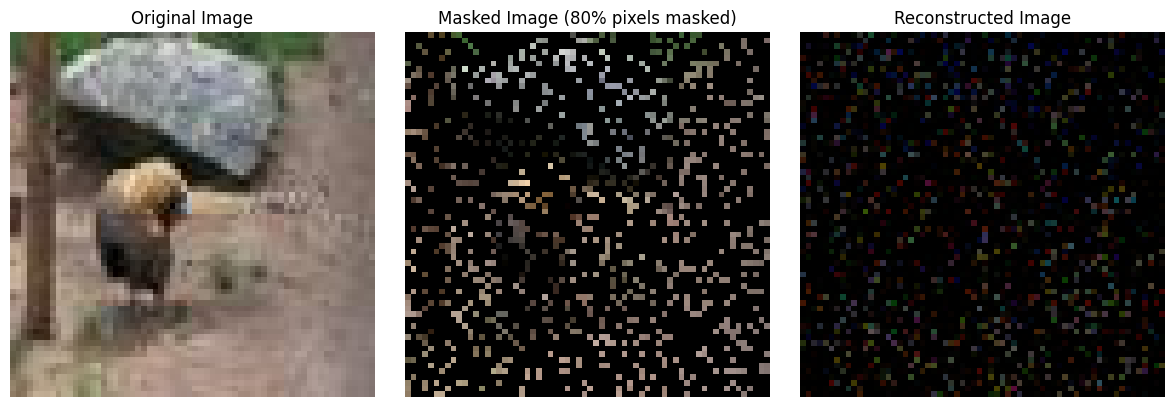

1/1 [==============================] - 0s 29ms/step


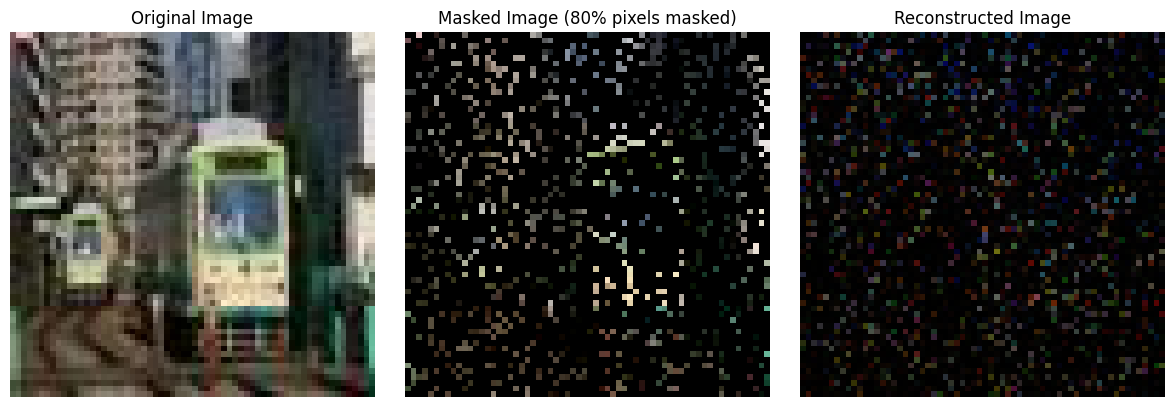

1/1 [==============================] - 0s 27ms/step


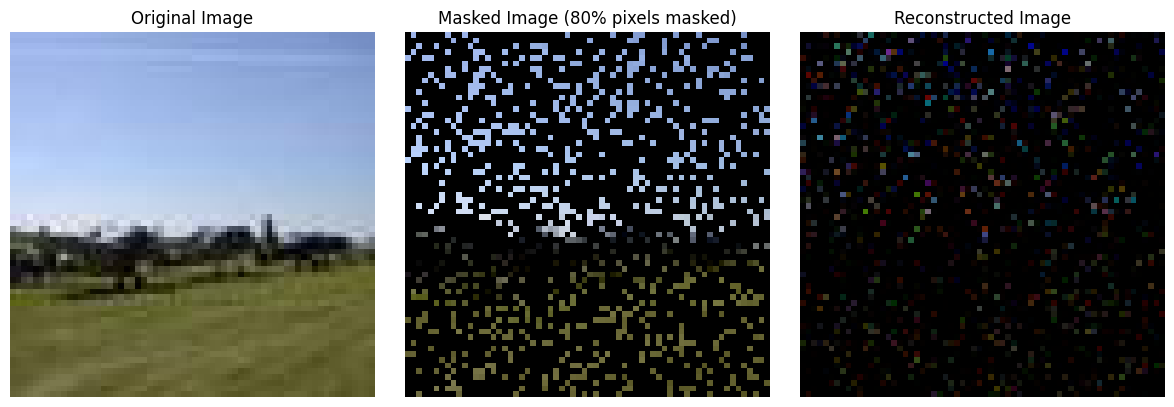

1/1 [==============================] - 0s 25ms/step


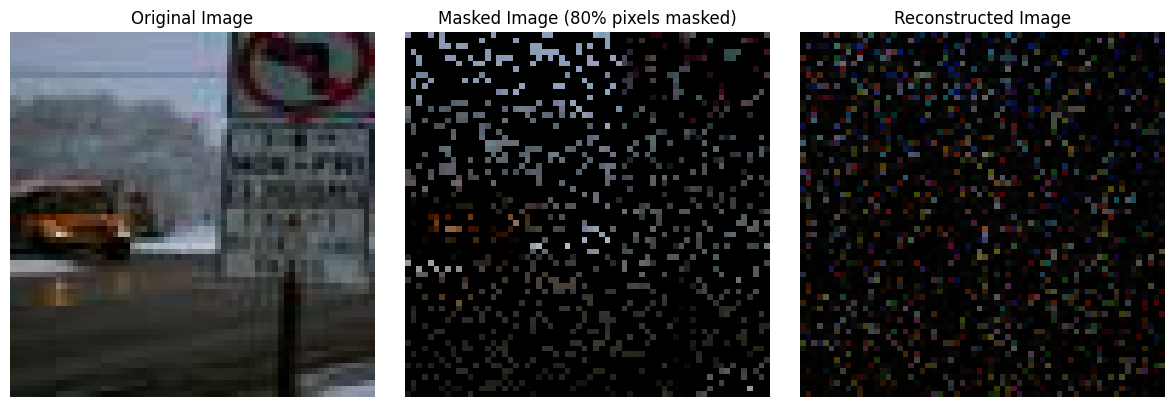

1/1 [==============================] - 0s 23ms/step


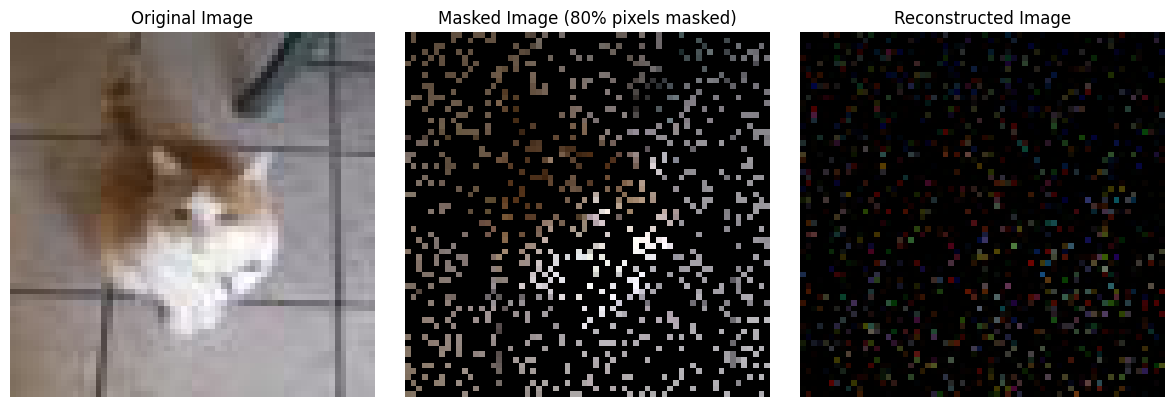

In [2]:
# Author: Debicharan Tripathy
# Roll no: m22ai545

import os
import random
import shutil
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Establish the random seed for consistency
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Constants
data_folder = 'Data'
preprocessed_folder = os.path.join(data_folder, 'preprocessed')
split_folder = os.path.join(data_folder, 'Split')
epochs = 20
num_images = 20
image_shape = (64, 64, 3)
bottleneck_dimensions = [256, 128, 64, 32, 16]
mask_percentages = [20, 40, 60, 80]

# Make the required directories.
split_80_10_10_folder = os.path.join(split_folder, '80-10-10')
split_70_10_20_folder = os.path.join(split_folder, '70-10-20')
os.makedirs(split_80_10_10_folder, exist_ok=True)
os.makedirs(split_70_10_20_folder, exist_ok=True)

# Split the dataset according to the 80-10-10 rule.
train_folder_80_10_10 = os.path.join(split_80_10_10_folder, 'train')
val_folder_80_10_10 = os.path.join(split_80_10_10_folder, 'val')
test_folder_80_10_10 = os.path.join(split_80_10_10_folder, 'test')
os.makedirs(train_folder_80_10_10, exist_ok=True)
os.makedirs(val_folder_80_10_10, exist_ok=True)
os.makedirs(test_folder_80_10_10, exist_ok=True)

# Obtain a sample of photos at random.
preprocessed_images = os.listdir(preprocessed_folder)
random.shuffle(preprocessed_images)
train_images_80_10_10 = preprocessed_images[:num_images]
val_images_80_10_10 = preprocessed_images[num_images:num_images*2]
test_images_80_10_10 = preprocessed_images[num_images*2:num_images*3]

# Place photos in the appropriate directories.
for image in train_images_80_10_10:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(train_folder_80_10_10, image))
for image in val_images_80_10_10:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(val_folder_80_10_10, image))
for image in test_images_80_10_10:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(test_folder_80_10_10, image))

# Split the dataset according to the 70-10-20 rule.
train_folder_70_10_20 = os.path.join(split_70_10_20_folder, 'train')
val_folder_70_10_20 = os.path.join(split_70_10_20_folder, 'val')
test_folder_70_10_20 = os.path.join(split_70_10_20_folder, 'test')
os.makedirs(train_folder_70_10_20, exist_ok=True)
os.makedirs(val_folder_70_10_20, exist_ok=True)
os.makedirs(test_folder_70_10_20, exist_ok=True)

# Obtain a sample of photos at random.
train_images_70_10_20 = preprocessed_images[:num_images]
val_images_70_10_20 = preprocessed_images[num_images:num_images*2]
test_images_70_10_20 = preprocessed_images[num_images*2:num_images*3]

# Place photos in the appropriate directories.
for image in train_images_70_10_20:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(train_folder_70_10_20, image))
for image in val_images_70_10_20:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(val_folder_70_10_20, image))
for image in test_images_70_10_20:
    shutil.copy(os.path.join(preprocessed_folder, image), os.path.join(test_folder_70_10_20, image))

# Model for the autoencoding
def create_autoencoder(bottleneck_dim):
    input_img = tf.keras.Input(shape=image_shape)
    encoded = tf.keras.layers.Flatten()(input_img)
    encoded = tf.keras.layers.Dense(bottleneck_dim, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(np.prod(image_shape), activation='sigmoid')(encoded)
    decoded = tf.keras.layers.Reshape(image_shape)(decoded)

    autoencoder = tf.keras.Model(input_img, decoded)
    return autoencoder

# Educate and assess autoencoder models
reconstruction_errors = []
mse_values = []
mae_values = []

for bottleneck_dim in bottleneck_dimensions:
    print(f"Training and evaluating autoencoder with bottleneck dimension: {bottleneck_dim}")

    # Design an autoencoder
    autoencoder = create_autoencoder(bottleneck_dim)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Load the practise or training material
    train_images = []
    for image_file in train_images_80_10_10:
        image_path = os.path.join(train_folder_80_10_10, image_file)
        image = Image.open(image_path)
        image_array = np.array(image)
        train_images.append(image_array)
    train_images = np.array(train_images)

    # Standardise the pixel values
    train_images = train_images / 255.0

    # Autoencoder for the trains
    autoencoder.fit(train_images, train_images, epochs=epochs, verbose=0)

    # Test the data load
    test_images = []
    for image_file in test_images_80_10_10:
        image_path = os.path.join(test_folder_80_10_10, image_file)
        image = Image.open(image_path)
        image_array = np.array(image)
        test_images.append(image_array)
    test_images = np.array(test_images)

    # Standardise the pixel values
    test_images = test_images / 255.0

    # Assess the autoencoder
    reconstructed_images = autoencoder.predict(test_images)
    mse = np.mean(np.square(test_images - reconstructed_images))
    mae = np.mean(np.abs(test_images - reconstructed_images))

    # Store results or Outcomes
    reconstruction_errors.append(np.mean(np.square(test_images - reconstructed_images), axis=(1, 2, 3)))
    mse_values.append(mse)
    mae_values.append(mae)

# Each autoencoder model's plot reconstruction error
plt.figure(figsize=(12, 6))
for i, bottleneck_dim in enumerate(bottleneck_dimensions):
    plt.plot(reconstruction_errors[i], label=f"Bottleneck Dimension: {bottleneck_dim}")
plt.xlabel('Image Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Bottleneck Dimensions')
plt.legend()
plt.show()

# Considering the reconstruction error, choose the best bottleneck dimension.
best_bottleneck_dim = bottleneck_dimensions[np.argmin(mse_values)]
print(f"The best bottleneck dimension is: {best_bottleneck_dim}")

# Create a bottleneck-optimized autoencoder model.
autoencoder_best = create_autoencoder(best_bottleneck_dim)
autoencoder_best.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_best.summary()

# Develop and test an autoencoder model using a masking method.
mse_values_masked = []
mae_values_masked = []

for mask_percentage in mask_percentages:
    print(f"Training and evaluating autoencoder with {mask_percentage}% masked pixels")

    # Mask or Hide the images
    masked_images = []
    for image_file in test_images_80_10_10:
        image_path = os.path.join(test_folder_80_10_10, image_file)
        image = Image.open(image_path)
        image_array = np.array(image)
        mask = np.random.choice(
            [0, 1], size=image_shape[:2], p=[mask_percentage / 100, (100 - mask_percentage) / 100]
        )
        masked_image = image_array * np.expand_dims(mask, axis=2)
        masked_images.append(masked_image)
    masked_images = np.array(masked_images)

    # Standardise the pixel values
    masked_images = masked_images / 255.0

    # Autoencoder training using masked pictures
    autoencoder_best.fit(masked_images, masked_images, epochs=epochs, verbose=0)

    # Reconstruct the images
    reconstructed_images_masked = autoencoder_best.predict(masked_images)
    mse_masked = np.mean(np.square(masked_images - reconstructed_images_masked))
    mae_masked = np.mean(np.abs(masked_images - reconstructed_images_masked))

    # Store the results
    mse_values_masked.append(mse_masked)
    mae_values_masked.append(mae_masked)

# Reconstruction error plotted against each mask's percentage
plt.figure(figsize=(12, 6))
plt.plot(mask_percentages, mse_values_masked, label='MSE')
plt.plot(mask_percentages, mae_values_masked, label='MAE')
plt.xlabel('Mask Percentage')
plt.ylabel('Error')
plt.title('Reconstruction Error for Different Mask Percentages')
plt.legend()
plt.show()

# Evaluation of the results
print("Evaluation Results:")
print("===================")
print("Bottleneck Dimension\tMSE\t\t\tMAE")
print("---------------------------------------------")
for i, bottleneck_dim in enumerate(bottleneck_dimensions):
    print(f"{bottleneck_dim}\t\t\t{mse_values[i]}\t\t{mae_values[i]}")

print(f"\nBest Bottleneck Dimension: {best_bottleneck_dim}")
print(f"Best Mask Percentage: {mask_percentages[np.argmin(mse_values_masked)]}")
print("=============================================")

# Compare and visualise the original, masked, and rebuilt images.
num_images_to_visualize = 5  # Change this to the amount of photographs you want to see.

for mask_percentage in mask_percentages:
    for i in range(num_images_to_visualize):
        image_file = test_images_80_10_10[i]
        image_path = os.path.join(test_folder_80_10_10, image_file)

        # Load the original image
        original_image = Image.open(image_path)

        # Create the masked image
        mask = np.random.choice([0, 1], size=image_shape[:2], p=[mask_percentage / 100, (100 - mask_percentage) / 100])
        masked_image = np.array(original_image) * np.expand_dims(mask, axis=2)

        # Normalize the pixel values
        masked_image = masked_image / 255.0

        # Reconstruct the image
        reconstructed_image = autoencoder_best.predict(np.expand_dims(masked_image, axis=0))[0]

        # Plot or Draw the images
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(original_image)
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(masked_image)
        axes[1].set_title(f'Masked Image ({mask_percentage}% pixels masked)')
        axes[1].axis('off')

        axes[2].imshow(reconstructed_image)
        axes[2].set_title('Reconstructed Image')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()